In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1_QxJlcifVbiTIKwXcbHDq9Dwwcw7UmBc'

In [0]:
fluff, id = link.split('=')
print (id)

1_QxJlcifVbiTIKwXcbHDq9Dwwcw7UmBc


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Stock.csv')  
ip = pd.read_csv('Stock.csv')

In [0]:
ip

,Date,Open,High,Low,Close,Volume,OpenInt
0,18-11-1999,30.713,33.754,27.002,29.702,66277506,0
1,19-11-1999,28.986,29.027,26.872,27.257,16142920,0
2,22-11-1999,27.886,29.702,27.044,29.702,6970266,0
3,23-11-1999,28.688,29.446,27.002,27.002,6332082,0
4,24-11-1999,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,06-11-2017,68.220,68.450,68.220,68.220,995731,0
4517,07-11-2017,68.320,68.640,68.040,68.250,966466,0
4518,08-11-2017,68.100,68.330,67.771,68.110,972616,0
4519,09-11-2017,67.920,67.980,66.910,67.470,1673083,0


In [0]:
X=ip.drop('Date',axis=1).drop('Close',axis=1)
y=ip['Close']

In [0]:
X

,Open,High,Low,Volume,OpenInt
0,30.713,33.754,27.002,66277506,0
1,28.986,29.027,26.872,16142920,0
2,27.886,29.702,27.044,6970266,0
3,28.688,29.446,27.002,6332082,0
4,27.083,28.309,27.002,5132147,0
...,...,...,...,...,...
4516,68.220,68.450,68.220,995731,0
4517,68.320,68.640,68.040,966466,0
4518,68.100,68.330,67.771,972616,0
4519,67.920,67.980,66.910,1673083,0


In [0]:
y

0       29.702
1       27.257
2       29.702
3       27.002
4       27.717
         ...  
4516    68.220
4517    68.250
4518    68.110
4519    67.470
4520    66.810
Name: Close, Length: 4521, dtype: float64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [0]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train,verbose=False)

[07:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
pred=XGBModel.predict(X_test)

In [0]:
pred

array([55.448437 , 21.604582 , 13.760755 , 36.69772  , 41.262684 ,
       25.785183 , 30.566732 , 46.42087  , 23.144558 , 13.809984 ,
       46.371933 , 32.864376 , 20.975603 , 26.396084 , 21.264093 ,
       20.418781 , 14.513647 , 39.085484 , 39.02848  , 19.247652 ,
       21.667643 , 22.577478 , 24.765978 ,  9.510729 , 12.971201 ,
       27.633533 , 38.287758 , 12.536129 , 45.77453  , 14.888793 ,
       50.618034 , 24.247879 , 16.85958  , 40.734592 , 24.312319 ,
       42.06481  , 18.042524 , 30.23623  , 24.897808 , 21.344206 ,
       23.60897  , 39.269417 , 44.613457 , 51.4719   , 31.944221 ,
       25.27808  , 26.396084 , 21.00132  , 25.785183 , 17.736517 ,
       40.475266 , 40.734592 , 39.749138 , 34.760174 , 46.22031  ,
       24.574768 , 16.062445 , 31.958359 , 25.088146 , 41.288136 ,
       24.247879 , 19.815718 , 44.61327  , 11.060686 , 14.513647 ,
       16.585978 , 18.915457 , 19.815718 , 22.42127  , 23.243631 ,
       24.312319 , 21.604582 , 17.259623 , 24.247879 , 13.2292

In [0]:
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred)))
test_set_r2=r2_score(y_test,pred)
test_set_mae=mean_absolute_error(y_test,pred)

In [0]:
test_set_rmse

0.5368128879209143

In [0]:
test_set_r2

0.9982622718475536

In [0]:
test_set_mae

0.29015932293148755

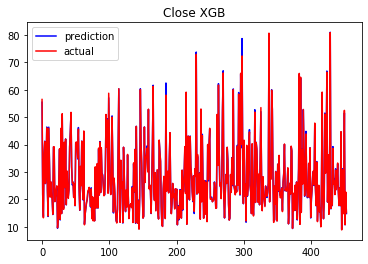

In [0]:
x=np.arange(0,453)
plt.title('Close XGB')
plt.plot(x,pred,'b-',label='prediction')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

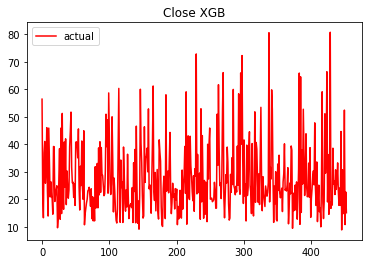

In [0]:
x=np.arange(0,453)
plt.title('Close XGB')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

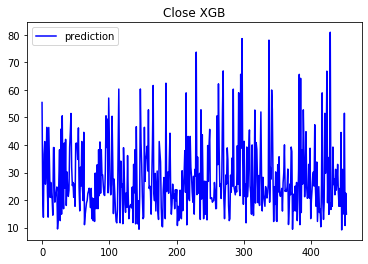

In [0]:
x=np.arange(0,453)
plt.title('Close XGB')
plt.plot(x,pred,'b-',label='prediction')
plt.legend()
plt.show()